### Importación de las Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

### Carga del Dataset

In [2]:
# Nombre las columnas
dataframe = pd.read_csv("Activities.csv")
dataframe

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,activity,activity_name
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104,2,WALKING_UPSTAIRS
10925,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748,2,WALKING_UPSTAIRS
10926,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527,2,WALKING_UPSTAIRS
10927,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865,2,WALKING_UPSTAIRS


Eliminación de variables que no contienen datos relevantes

In [3]:
not_relevant = ["STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
dataframe_reduced = dataframe[~dataframe["activity_name"].isin(not_relevant)]
dataframe_reduced

,tBodyAccMean1,tBodyAccMean2,tBodyAccMean3,tBodyAccSTD1,tBodyAccSTD2,tBodyAccSTD3,tBodyAccMad1,tBodyAccMad2,tBodyAccMad3,tBodyAccMax1,...,fBodyGyroJerkMagKurtosis1,tBodyAccAngleWRTGravity1,tBodyAccJerkAngleWRTGravity1,tBodyGyroAngleWRTGravity1,tBodyGyroJerkAngleWRTGravity1,tXAxisAccAngleWRTGravity1,tYAxisAccAngleWRTGravity1,tZAxisAccAngleWRTGravity1,activity,activity_name
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104,2,WALKING_UPSTAIRS
10925,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748,2,WALKING_UPSTAIRS
10926,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527,2,WALKING_UPSTAIRS
10927,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865,2,WALKING_UPSTAIRS


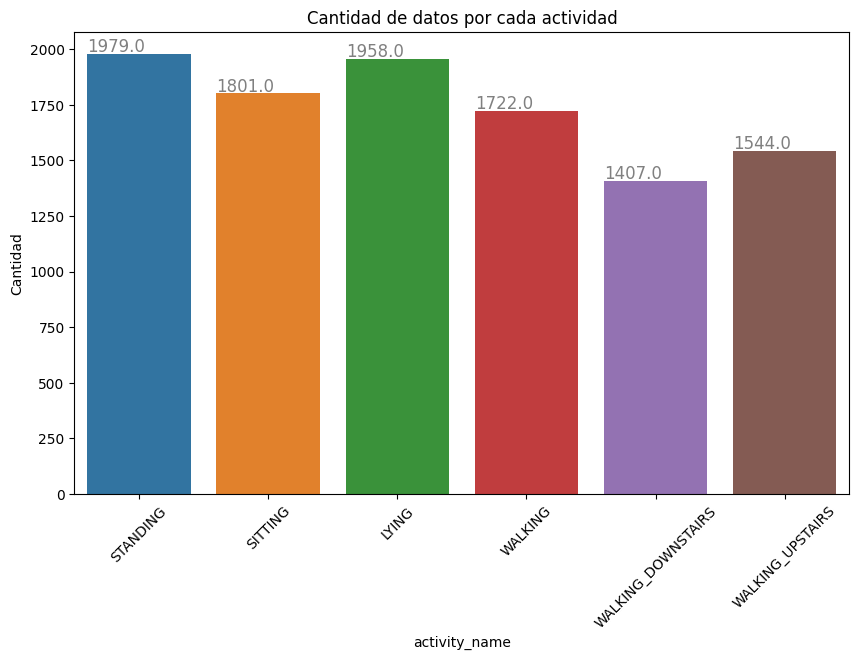

In [4]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "activity_name", data = dataframe_reduced)
for i in ax.patches:
    ax.text(x = i.get_x(), y = i.get_height() + 10, s = str(i.get_height()), fontsize = 12, color = "gray")
plt.title("Cantidad de datos por cada actividad")
plt.ylabel("Cantidad")
plt.xticks(rotation = 45)
plt.show()

### Implementación algoritmos
Entrenamiento

In [5]:
X=dataframe_reduced.drop(["activity","activity_name"],axis=1)
y=dataframe_reduced["activity"]

print(X.shape)
print(y.shape)
print("Los valores de y son ",y)

(10411, 561)
(10411,)
Los valores de y son  0        5
1        5
2        5
3        5
4        5
        ..
10924    2
10925    2
10926    2
10927    2
10928    2
Name: activity, Length: 10411, dtype: int64


In [6]:
XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.3,random_state=6)
print(yTrain)

9598     5
3831     5
147      2
2850     3
3047     5
        ..
8939     6
4958     3
10706    3
8830     1
2913     6
Name: activity, Length: 7287, dtype: int64


### Implementación NaiveBayes

In [7]:
modelo=GaussianNB()
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print(yPredict)

[4 6 4 ... 3 6 6]


### Metricas

[[395  88  64   0   0   0]
 [  9 437  32   0   0   0]
 [ 25  61 327   0   0   0]
 [  0   4   0 495  30   5]
 [  0  12   0 415 149   0]
 [  0   3   0  35   0 538]]


<Axes: >

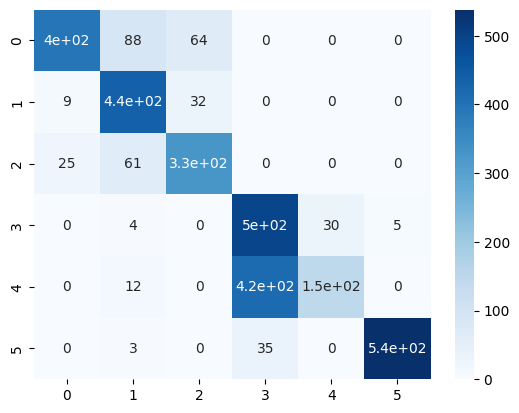

In [8]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

In [9]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LYING']
print(classification_report(yTest,yPredict,target_names=etiquetas))

                    precision    recall  f1-score   support

           WALKING       0.92      0.72      0.81       547
  WALKING_UPSTAIRS       0.72      0.91      0.81       478
WALKING_DOWNSTAIRS       0.77      0.79      0.78       413
           SITTING       0.52      0.93      0.67       534
          STANDING       0.83      0.26      0.39       576
             LYING       0.99      0.93      0.96       576

          accuracy                           0.75      3124
         macro avg       0.79      0.76      0.74      3124
      weighted avg       0.80      0.75      0.73      3124

